In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
df = pd.read_csv("Copy of housing_data_set.csv")

 **Get to know your data**

In [ ]:
df.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20637.000000,20637.000000,20637.000000,20637.000000,20634.000000,20430.000000,20637.000000,20637.000000,20633.000000,20637.000000
mean,10320.016427,-119.569644,35.631892,28.638610,2634.813463,537.882281,1425.500073,499.545089,4.170570,207145.445607
std,5957.582192,2.003581,2.136006,12.585487,2180.495566,421.414364,1132.539593,382.356734,1.899838,115400.695065
min,1.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.799900,15299.000000
25%,5161.000000,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,280.000000,2.862500,119900.000000
50%,10320.000000,-118.490000,34.260000,29.000000,2126.000000,435.000000,1166.000000,409.000000,3.834900,180000.000000
75%,15479.000000,-118.010000,37.710000,37.000000,3146.000000,647.000000,1725.000000,605.000000,5.043100,265000.000000
max,20640.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.300100,500301.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20637 entries, 0 to 20636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20637 non-null  int64  
 1   longitude           20637 non-null  float64
 2   latitude            20637 non-null  float64
 3   housing_median_age  20637 non-null  int64  
 4   total_rooms         20634 non-null  float64
 5   total_bedrooms      20430 non-null  float64
 6   population          20637 non-null  int64  
 7   households          20637 non-null  int64  
 8   median_income       20633 non-null  float64
 9   median_house_value  20637 non-null  int64  
 10  ocean_proximity     20627 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
# In the given datasets we have 9 continuous variables and one categorical variable. ML algorithms do not work well with categorical data.
# So, we will convert the categorical data.
df.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.23,37.88,41,880.0,129.0,322,126,8.6252,452900,NEAR BAY
1,2,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.6014,358800,NEAR BAY
2,3,-122.24,37.85,52,1467.0,190.0,496,177,7.5574,352400,NEAR BAY
3,4,-122.25,37.85,52,1274.0,235.0,558,219,5.9431,341600,NEAR BAY
4,5,-122.25,37.85,52,1627.0,280.0,565,259,4.1462,342500,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20637 entries, 0 to 20636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20637 non-null  int64  
 1   longitude           20637 non-null  float64
 2   latitude            20637 non-null  float64
 3   housing_median_age  20637 non-null  int64  
 4   total_rooms         20634 non-null  float64
 5   total_bedrooms      20430 non-null  float64
 6   population          20637 non-null  int64  
 7   households          20637 non-null  int64  
 8   median_income       20633 non-null  float64
 9   median_house_value  20637 non-null  int64  
 10  ocean_proximity     20627 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
df.drop(columns=["id"],inplace=True)

**Working with categorical data**

In [ ]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9134
INLAND        6545
NEAR OCEAN    2658
NEAR BAY      2285
ISLAND           5
Name: count, dtype: int64

In [ ]:
# sns.countplot(df.ocean_proximity)

In [ ]:
# ONE HOT ENCODING -------------
new_val = pd.get_dummies(df.ocean_proximity)

In [ ]:
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False


In [ ]:
df[new_val.columns] = new_val

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20637.000000,20637.000000,20637.000000,20634.000000,20430.000000,20637.000000,20637.000000,20633.000000,20637.000000
mean,-119.569644,35.631892,28.638610,2634.813463,537.882281,1425.500073,499.545089,4.170570,207145.445607
std,2.003581,2.136006,12.585487,2180.495566,421.414364,1132.539593,382.356734,1.899838,115400.695065
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.799900,15299.000000
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,280.000000,2.862500,119900.000000
50%,-118.490000,34.260000,29.000000,2126.000000,435.000000,1166.000000,409.000000,3.834900,180000.000000
75%,-118.010000,37.710000,37.000000,3146.000000,647.000000,1725.000000,605.000000,5.043100,265000.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.300100,500301.000000


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20637.000000,20637.000000,20637.000000,20634.000000,20430.000000,20637.000000,20637.000000,20633.000000,20637.000000
mean,-119.569644,35.631892,28.638610,2634.813463,537.882281,1425.500073,499.545089,4.170570,207145.445607
std,2.003581,2.136006,12.585487,2180.495566,421.414364,1132.539593,382.356734,1.899838,115400.695065
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.799900,15299.000000
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,280.000000,2.862500,119900.000000
50%,-118.490000,34.260000,29.000000,2126.000000,435.000000,1166.000000,409.000000,3.834900,180000.000000
75%,-118.010000,37.710000,37.000000,3146.000000,647.000000,1725.000000,605.000000,5.043100,265000.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.300100,500301.000000


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880.0,129.0,322,126,8.6252,452900,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.6014,358800,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52,1467.0,190.0,496,177,7.5574,352400,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52,1274.0,235.0,558,219,5.9431,341600,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52,1627.0,280.0,565,259,4.1462,342500,NEAR BAY,False,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20637 entries, 0 to 20636
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20637 non-null  float64
 1   latitude            20637 non-null  float64
 2   housing_median_age  20637 non-null  int64  
 3   total_rooms         20634 non-null  float64
 4   total_bedrooms      20430 non-null  float64
 5   population          20637 non-null  int64  
 6   households          20637 non-null  int64  
 7   median_income       20633 non-null  float64
 8   median_house_value  20637 non-null  int64  
 9   ocean_proximity     20627 non-null  object 
 10  <1H OCEAN           20637 non-null  bool   
 11  INLAND              20637 non-null  bool   
 12  ISLAND              20637 non-null  bool   
 13  NEAR BAY            20637 non-null  bool   
 14  NEAR OCEAN          20637 non-null  bool   
dtypes: bool(5), float64(5), int64(4), object(1)
memory us

In [ ]:
df.drop(columns=["ocean_proximity"],inplace=True)

<Axes: >

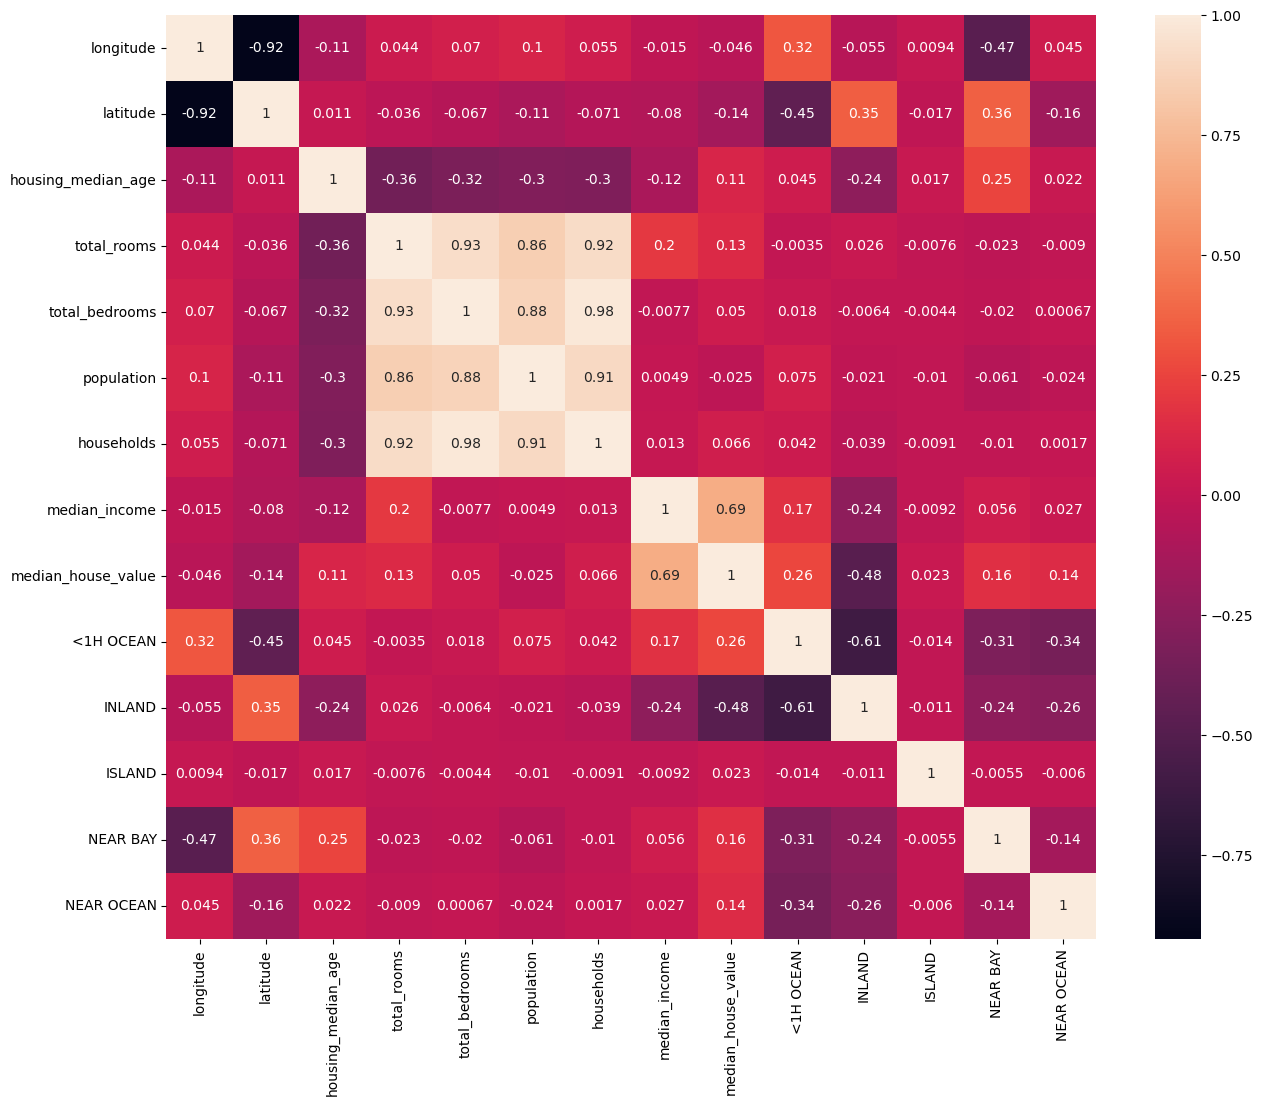

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688053
<1H OCEAN             0.256619
NEAR BAY              0.160229
NEAR OCEAN            0.141902
total_rooms           0.133701
housing_median_age    0.105580
households            0.065852
total_bedrooms        0.049704
ISLAND                0.023418
population           -0.024636
longitude            -0.045939
latitude             -0.144174
INLAND               -0.484644
Name: median_house_value, dtype: float64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

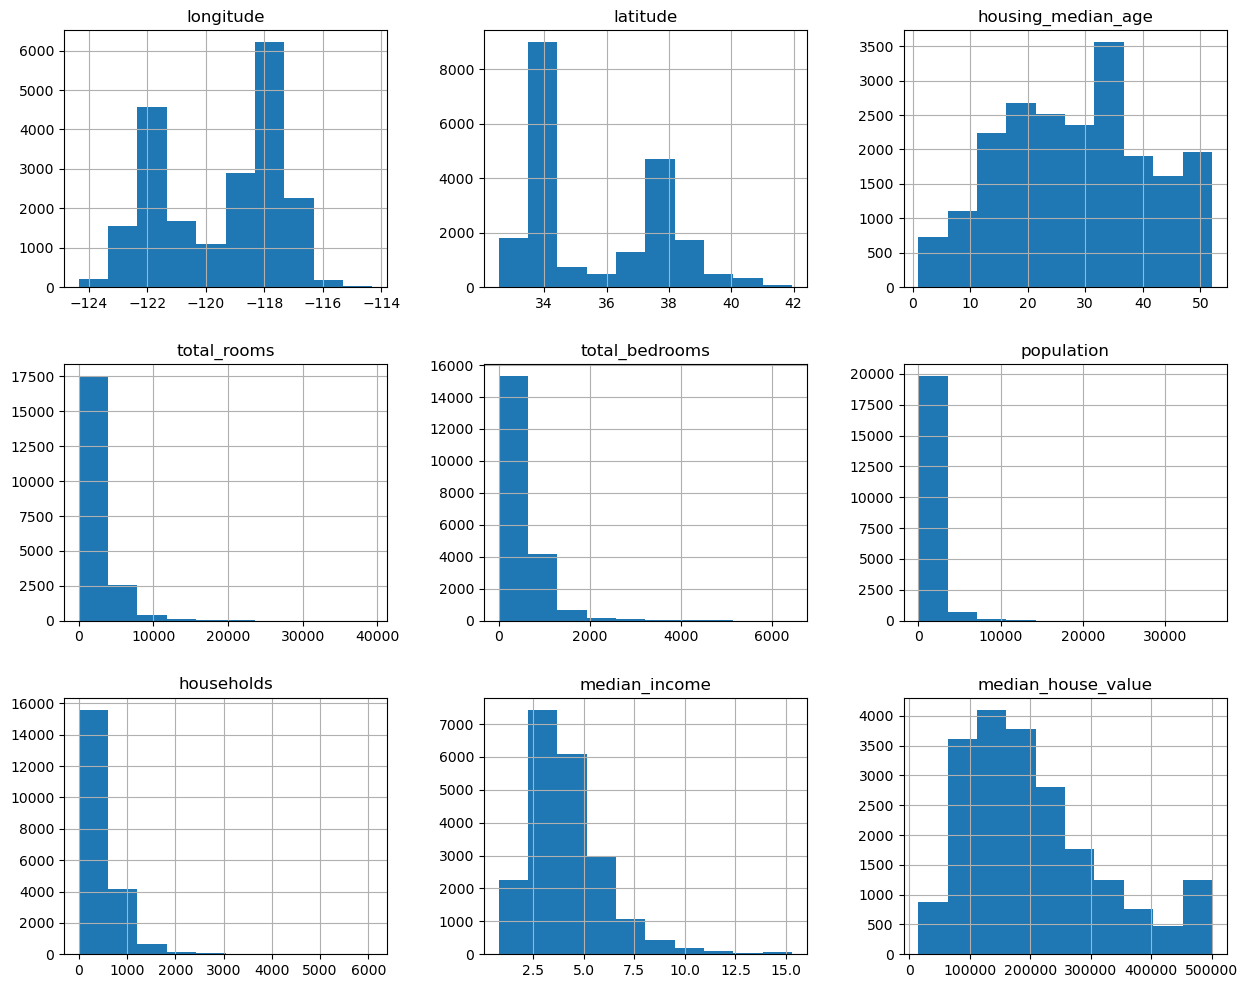

In [ ]:
df.hist(figsize=(15,12))

<Axes: >

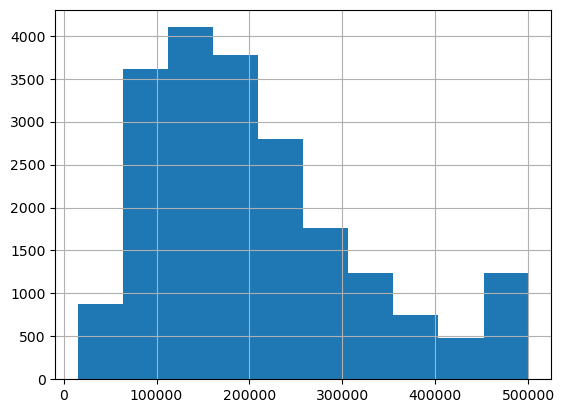

In [ ]:
df.median_house_value.hist()

C:\Users\Sreekanth\AppData\Local\Temp\ipykernel_19644\2548506570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.median_house_value)


<Axes: xlabel='median_house_value', ylabel='Density'>

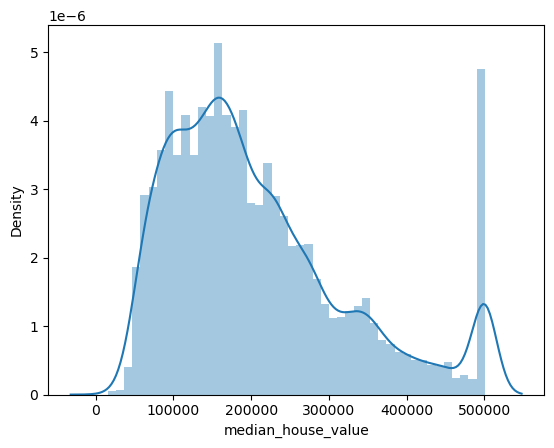

In [ ]:
sns.distplot(df.median_house_value)

In [ ]:
# We can see that the median house value is mostly falls between 10,0000 to 30,0000 with few exceptions.

**Data Cleaning**

In [ ]:
# We will need to replace all the null values.
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             3
total_bedrooms        207
population              0
households              0
median_income           4
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [ ]:
# So, we have 207 null values. We can drop the rows with null values or we can replace the null values.
# 207 is too big a number to drop rows
df = df.fillna(df.mean())

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

**Data Scaling**

In [ ]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler()

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [ ]:
feature = df.drop(['median_house_value'], axis=1)
label = df.median_house_value

In [ ]:
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(df.median_house_value.values.reshape(-1,1)).flatten()

In [ ]:
featureT

array([[-1.32783311,  1.05250722,  0.98221776, ..., -0.01556734,
         2.83399186, -0.38449856],
       [-1.32284192,  1.04314373, -0.60695268, ..., -0.01556734,
         2.83399186, -0.38449856],
       [-1.3328243 ,  1.03846198,  1.8562615 , ..., -0.01556734,
         2.83399186, -0.38449856],
       ...,
       [-0.82372337,  1.77817803, -0.92478677, ..., -0.01556734,
        -0.35285916, -0.38449856],
       [-0.87363523,  1.77817803, -0.84532825, ..., -0.01556734,
        -0.35285916, -0.38449856],
       [-0.83370574,  1.75008755, -1.00424529, ..., -0.01556734,
        -0.35285916, -0.38449856]])

In [ ]:
labelT

array([ 2.12962763,  1.31418818,  1.25872789, ..., -0.99261292,
       -1.05847201, -1.01774336])

**Split the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)

**ML Model - Linear Regression**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.4530474304364882

**Cross Validation Score**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(linear_reg, feature_train,label_train, cv=10)

array([0.64454307, 0.65892196, 0.6501725 , 0.64641191, 0.65783451,
       0.60048324, 0.6602602 , 0.64188881, 0.64757394, 0.63659318])

In [ ]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test)

In [ ]:
reg_score

0.4611664486721634

In [ ]:
linear_reg.coef_

array([-0.46675712, -0.47332979,  0.12158958, -0.07751416,  0.25878968,
       -0.38597189,  0.253079  ,  0.63767051,  0.22308394,  0.04943343,
        0.02427763,  0.12890033,  0.16564966])

In [ ]:
pd.DataFrame(linear_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
median_income,0.637671
total_bedrooms,0.258790
households,0.253079
<1H OCEAN,0.223084
NEAR OCEAN,0.165650
NEAR BAY,0.128900
housing_median_age,0.121590
INLAND,0.049433
ISLAND,0.024278
total_rooms,-0.077514


In [ ]:
df.corr().median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687976
<1H OCEAN             0.256619
NEAR BAY              0.160229
NEAR OCEAN            0.141902
total_rooms           0.133678
housing_median_age    0.105580
households            0.065852
total_bedrooms        0.049471
ISLAND                0.023418
population           -0.024636
longitude            -0.045939
latitude             -0.144174
INLAND               -0.484644
Name: median_house_value, dtype: float64

### Regression using models other than Linear Regression 

****RANSAC Regression****

In [ ]:
ransac_reg = linear_model.RANSACRegressor()

In [ ]:
ransac_reg.fit(feature_train,label_train)
r2_score(ransac_reg.predict(feature_train),label_train)

0.527548400047949

In [ ]:
ransac_score = r2_score(ransac_reg.predict(feature_test),label_test)

In [ ]:
ransac_score

0.5349207045758843

In [ ]:
# Ransac regrssor is performing way poorly than Linear Regresson

**Ridge Regressor**

In [ ]:
ridge_reg = linear_model.Ridge(random_state=19)
ridge_reg.fit(feature_train,label_train)

Ridge(random_state=19)

In [ ]:
r2_score(ridge_reg.predict(feature_train),label_train)

0.45292029316228677

In [ ]:
ridge_score = r2_score(ridge_reg.predict(feature_test),label_test)

In [ ]:
ridge_score

0.4610425546450775

In [ ]:
ridge_reg.coef_

array([-0.46577723, -0.47231792,  0.12159783, -0.07735144,  0.25854617,
       -0.38576801,  0.2529769 ,  0.63762202,  0.21129155,  0.03810343,
        0.02391249,  0.12150002,  0.15775128])

In [ ]:
pd.DataFrame(ridge_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
median_income,0.637622
total_bedrooms,0.258546
households,0.252977
<1H OCEAN,0.211292
NEAR OCEAN,0.157751
housing_median_age,0.121598
NEAR BAY,0.121500
INLAND,0.038103
ISLAND,0.023912
total_rooms,-0.077351
